Import libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, RepeatVector, TimeDistributed, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


Load the dataset.

In [2]:
df = pd.read_csv('Updated dataset.csv')
df

,Unnamed: 0,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,timestamp,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
0,0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,2024-05-15 13:33:07.000,42.366430,42.965117,16.0
...,...,...,...,...,...,...,...,...,...,...,...
3574,3574,0.00000,22.0625,23.3750,0.000,0.00000,232.80000,2024-05-31 17:48:06.704,55.243160,37.600000,26.0
3575,3575,0.00000,22.5625,23.6875,0.000,0.00000,232.89999,2024-05-31 17:48:25.578,56.885740,36.930000,26.0
3576,3576,0.00000,23.0000,24.1250,0.000,0.00000,233.00000,2024-05-31 17:48:44.452,57.664060,36.770000,26.0
3577,3577,0.06978,23.3125,24.3125,0.000,0.00000,233.00000,2024-05-31 17:49:03.326,57.103520,37.010000,26.0


Removing the 'Unnamed: 0' column

In [3]:
columns_to_remove = ['Unnamed: 0']
df.drop(columns=columns_to_remove,inplace=True)
df

,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,timestamp,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
0,0.56249,9.5625,17.0625,7.632,1717.69995,229.30000,2024-05-15 13:30:00.000,41.872580,43.204799,16.0
1,1.02559,9.5625,17.1250,7.597,1708.90002,229.30000,2024-05-15 13:30:46.750,42.127048,43.079669,16.0
2,1.46180,9.5625,17.0625,7.683,1730.09998,229.50000,2024-05-15 13:31:33.500,42.249997,43.024747,16.0
3,1.34875,9.5625,17.1250,7.628,1717.90002,229.50000,2024-05-15 13:32:20.250,42.248148,43.027283,16.0
4,1.54852,9.5625,17.0625,7.607,1711.00000,229.39999,2024-05-15 13:33:07.000,42.366430,42.965117,16.0
...,...,...,...,...,...,...,...,...,...,...
3574,0.00000,22.0625,23.3750,0.000,0.00000,232.80000,2024-05-31 17:48:06.704,55.243160,37.600000,26.0
3575,0.00000,22.5625,23.6875,0.000,0.00000,232.89999,2024-05-31 17:48:25.578,56.885740,36.930000,26.0
3576,0.00000,23.0000,24.1250,0.000,0.00000,233.00000,2024-05-31 17:48:44.452,57.664060,36.770000,26.0
3577,0.06978,23.3125,24.3125,0.000,0.00000,233.00000,2024-05-31 17:49:03.326,57.103520,37.010000,26.0


In [4]:
numerical_columns = df.select_dtypes(include=['int64','float64']).columns.to_list()
numerical_columns

['AirFlowRate',
 'Vapor Temperature',
 'Liquid Temperature',
 'Current',
 'Power',
 'Voltage',
 'Outdoor Humidity',
 'Outdoor Temperature',
 'Indoor Temperature']

Normalization / Standardization

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)
scaled_data.head()

,AirFlowRate,Vapor Temperature,Liquid Temperature,Current,Power,Voltage,Outdoor Humidity,Outdoor Temperature,Indoor Temperature
0,0.256399,0.017595,0.028455,0.900319,0.889954,0.333334,0.196488,0.720662,0.0
1,0.467493,0.017595,0.032520,0.896190,0.885395,0.333334,0.203851,0.711253,0.0
2,0.666329,0.017595,0.028455,0.906335,0.896378,0.348485,0.207409,0.707124,0.0
3,0.614798,0.017595,0.032520,0.899847,0.890058,0.348485,0.207356,0.707315,0.0
4,0.705859,0.017595,0.028455,0.897369,0.886483,0.340909,0.210778,0.702640,0.0


Function for creating sliding windows

In [6]:
def create_sequences(df, window_size):
    sequences = []
    for i in range(len(df) - window_size):
        sequences.append(df[i:i + window_size])
    return np.array(sequences)

Setting the window size

In [7]:
window_size = 10
n_features = df.shape[1]
n_features

10

Creating the sequences from the data set.

In [8]:
sequences = create_sequences(scaled_data, window_size)

Spliting the sequences into training set and testing set. (80-20 split)

In [9]:
train_size = int(0.8*len(sequences))
train_sequences = sequences[:train_size]
test_sequences = sequences[train_size:]

In [10]:
train_sequences.shape
test_sequences.shape

(714, 10, 9)

Model Training

In [25]:
model = Sequential()
model.add(LSTM(64, input_shape=(10, 9), return_sequences=True))  # Return full sequence
model.add(Dense(9))  # Match the 9 features for each timestep

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(train_sequences, train_sequences, 
                    epochs=50, 
                    batch_size=32, 
                    validation_split=0.1, 
                    shuffle=False)

Epoch 1/50


c:\Users\Akila\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1041 - val_loss: 0.0218
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0328 - val_loss: 0.0125
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0219 - val_loss: 0.0089
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - val_loss: 0.0069
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - val_loss: 0.0056
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - val_loss: 0.0048
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - val_loss: 0.0042
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - val_loss: 0.0037
Epoch 10/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - val_loss: 0.0034
Epoch 11/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 12/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - val_loss: 0.0027


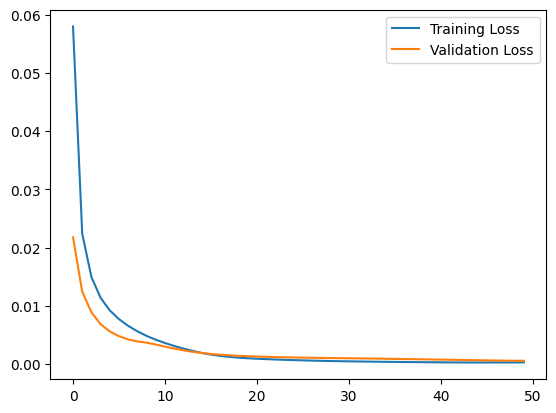

In [26]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [27]:
reconstructed_sequences = model.predict(test_sequences)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


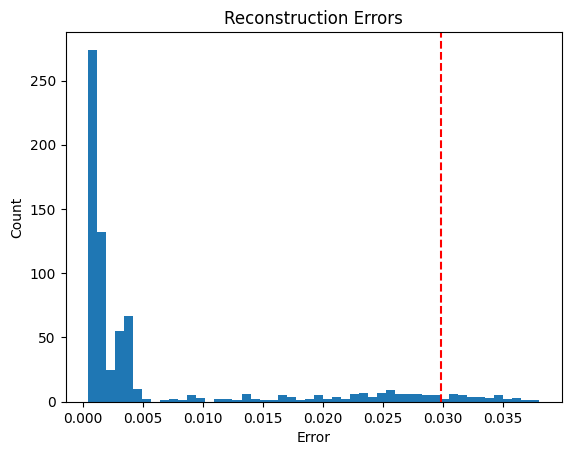

Anomalies detected at indices: [462 463 464 465 466 467 468 469 470 523 524 525 526 527 528 529 530 580
 581 582 583 584 585 586 634 635 636 637 638 639 640 709 710 711 712 713]


In [28]:
errors = []
for i in range(len(test_sequences)):
    errors.append(mean_squared_error(test_sequences[i], reconstructed_sequences[i]))

# Define a threshold for anomaly detection (95th percentile of reconstruction errors on training data)
threshold = np.percentile(errors, 95)

# Plot reconstruction errors
plt.hist(errors, bins=50)
plt.axvline(threshold, color='r', linestyle='--')
plt.title('Reconstruction Errors')
plt.xlabel('Error')
plt.ylabel('Count')
plt.show()

# Detect anomalies: errors above the threshold are considered anomalies
anomalies = np.where(errors > threshold)[0]

# Output the anomaly indices
print(f'Anomalies detected at indices: {anomalies}')